In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

plt.style.use("DirectDetectionPlots/notebooks/sty.mplstyle") 

In [10]:
base = "DirectDetectionPlots/data/limits/Electron/HeavyMediator/"
damic_m_2025 = pd.read_csv (base + "DAMIC-M_2025_Combined.txt", skiprows=2, names=["m", "s"], sep="\s+")
ds50_2023    = pd.read_csv (base + "DarkSide-50.txt", skiprows=3, names=["m", "s"], sep="\s+")
pandaX_2023  = pd.read_csv (base + "PandaX-2023.txt", skiprows=2, names=["m", "s"], sep=",")
pandaX_2023  = pd.read_csv (base + "PandaX-2023.txt", skiprows=2, names=["m", "s"], sep=",")

base = "DirectDetectionPlots/data/limits/Electron/HeavyMediator/Projections/"
oscura       = pd.read_csv (base + "OSCURA.txt",  skiprows=2, names=["m", "s"], sep="\s+")
ds20k    = pd.read_csv (base + "darkside20k-DMe-heavymed-18t-yr.csv", skiprows=1, names=["m", "s"], sep=",")
xenon10  = pd.read_csv ("xenon10.dat",skiprows=0, names=["m", "s"], sep="\s+")

base = "DirectDetectionPlots/data/limits/Nucleon/SI/"
ds50_2023_nr    = pd.read_csv (base + "DarkSide-50_2022.txt", skiprows=3, names=["m", "s"], sep="\s+")
cresst_II_nr    = pd.read_csv ("cresst.dat",skiprows=0, names=["m", "s"], sep="\s+")
news_nr    = pd.read_csv ("news.dat",skiprows=0, names=["m", "s"], sep="\s+")

base = "DirectDetectionPlots/data/limits/Nucleon/SI/"
ds50_2023_nr    = pd.read_csv (base + "DarkSide-50_2022.txt", skiprows=3, names=["m", "s"], sep="\s+")
cresst_nr       = pd.read_csv (base + "CRESST.txt", skiprows=1, names=["m", "s"], sep="\s+")

base = "DirectDetectionPlots/data/limits/Nucleon/SI/Projections/"
ds20k_nr    = pd.read_csv (base + "darkside20k-O1subGeVMigdal-18t-yr.csv", skiprows=1, names=["m", "s"], sep=",")
sCDMS_nr    = pd.read_csv (base + "SuperCDMS_SNOLAB.txt", skiprows=2, names=["m", "s"], sep="\s+")
sphere_nr   = pd.read_csv (base + "DarkSPHERE.txt", skiprows=2, names=["m", "s"], sep="\s+")
cresst_proj_nr   = pd.read_csv (base + "cresst_projected_2505.01183.dat", skiprows=0, names=["m", "s"], sep="\s+")

           m             s
0    100.903  1.146550e-38
1    108.423  4.693700e-39
2    125.751  1.374620e-39
3    133.915  9.404450e-40
4    147.828  6.291990e-40
5    189.266  3.681800e-40
6    214.638  2.754230e-40
7    256.895  2.518910e-40
8    292.645  2.518910e-40
9    297.952  2.014850e-40
10   320.159  1.127510e-40
11   436.516  4.316700e-41
12   684.104  2.310130e-41
13   936.930  2.066100e-41
14  1106.380  9.248270e-42
15  1354.280  5.533890e-42
16  1940.010  3.238200e-42
17  3447.950  3.096770e-42
18  5754.400  5.175350e-42


In [3]:
def reinterpret (mchi_MeV, mtarget_MeV, sigma) : 
    
    red_mass = mchi_MeV * mtarget_MeV /  ( mchi_MeV + mtarget_MeV )
    mA_MeV   = 3 * mchi_MeV
    alpha    = 1/137.036
    
    factor = alpha * 16 * np.pi 

    if mtarget_MeV < 1 : 
        return sigma / factor * pow ( mchi_MeV, 4) / (red_mass * red_mass) * pow( mA_MeV*mA_MeV + alpha*alpha*mtarget_MeV*mtarget_MeV , 2) / pow (mA_MeV,4) ;
    else : 
        return sigma / factor * pow ( mchi_MeV, 4) / (red_mass * red_mass) * pow( mA_MeV*mA_MeV + alpha*alpha*mtarget_MeV*mtarget_MeV , 2) / pow (mA_MeV,4)   ;

In [4]:
sigma_cm2_to_MeV_neg2 =  2.568e21

damic_m_2025_re = sigma_cm2_to_MeV_neg2* reinterpret (damic_m_2025.m.values, 0.511, damic_m_2025.s.values)
ds50_2023_re    = sigma_cm2_to_MeV_neg2* reinterpret (ds50_2023.m.values, 0.511, ds50_2023.s.values)
pandaX_2023_re  = sigma_cm2_to_MeV_neg2* reinterpret (pandaX_2023.m.values, 0.511, pandaX_2023.s.values)
oscura_re       = sigma_cm2_to_MeV_neg2* reinterpret (oscura.m.values, 0.511, oscura.s.values)
ds20k_re        = sigma_cm2_to_MeV_neg2* reinterpret (ds20k.m.values, 0.511, ds20k.s.values)
xe_re        = sigma_cm2_to_MeV_neg2* reinterpret (xenon10.m.values, 0.511, xenon10.s.values)

ds50_2023_nr_re = sigma_cm2_to_MeV_neg2* reinterpret (ds50_2023_nr.m.values*1e3, 938, ds50_2023_nr.s.values)
sCDMS_nr_re     = sigma_cm2_to_MeV_neg2* reinterpret (sCDMS_nr.m.values*1e3, 938, sCDMS_nr.s.values)
cresst_nr_re     = sigma_cm2_to_MeV_neg2* reinterpret (cresst_nr.m.values*1e3, 938, cresst_nr.s.values)
sphere_nr_re    = sigma_cm2_to_MeV_neg2* reinterpret (sphere_nr.m.values*1e3, 938, sphere_nr.s.values)
cresst_proj_nr_re = sigma_cm2_to_MeV_neg2* reinterpret (cresst_proj_nr.m.values*1e3, 938, cresst_proj_nr.s.values)
ds20k_nr_re     = sigma_cm2_to_MeV_neg2* reinterpret (ds20k_nr.m.values, 938, ds20k_nr.s.values)

cresst_II_re    = sigma_cm2_to_MeV_neg2* reinterpret (cresst_II_nr.m.values, 938, cresst_II_nr.s.values*1e-12)
news_nr_re    = sigma_cm2_to_MeV_neg2* reinterpret (news_nr.m.values, 938, news_nr.s.values)



               m             s
0     503.524031  1.791418e-24
1     563.432314  6.719945e-25
2     632.917059  1.786151e-25
3     705.480231  6.188140e-26
4     795.560846  2.650170e-26
5     904.125995  1.366312e-26
6    1039.525188  8.258093e-27
7    1237.635028  4.257513e-27
8    1422.979532  3.097766e-27
9    1623.445488  2.573273e-27
10   1895.735652  1.974224e-27
11   2213.695311  1.398879e-27
12   2420.128265  9.912055e-28
13   2645.811639  5.681666e-28
14   3018.547260  3.256775e-28
15   3443.792985  1.510178e-28
16   4084.238653  1.098805e-28
17   5015.759453  7.785820e-29
18   6018.126045  5.516809e-29
19   7390.722034  4.121825e-29
20   8765.182092  3.423946e-29
21  11233.240330  3.423946e-29
22  17679.694142  3.909053e-29
23  22309.243744  4.832181e-29
24  25157.842892  5.095199e-29


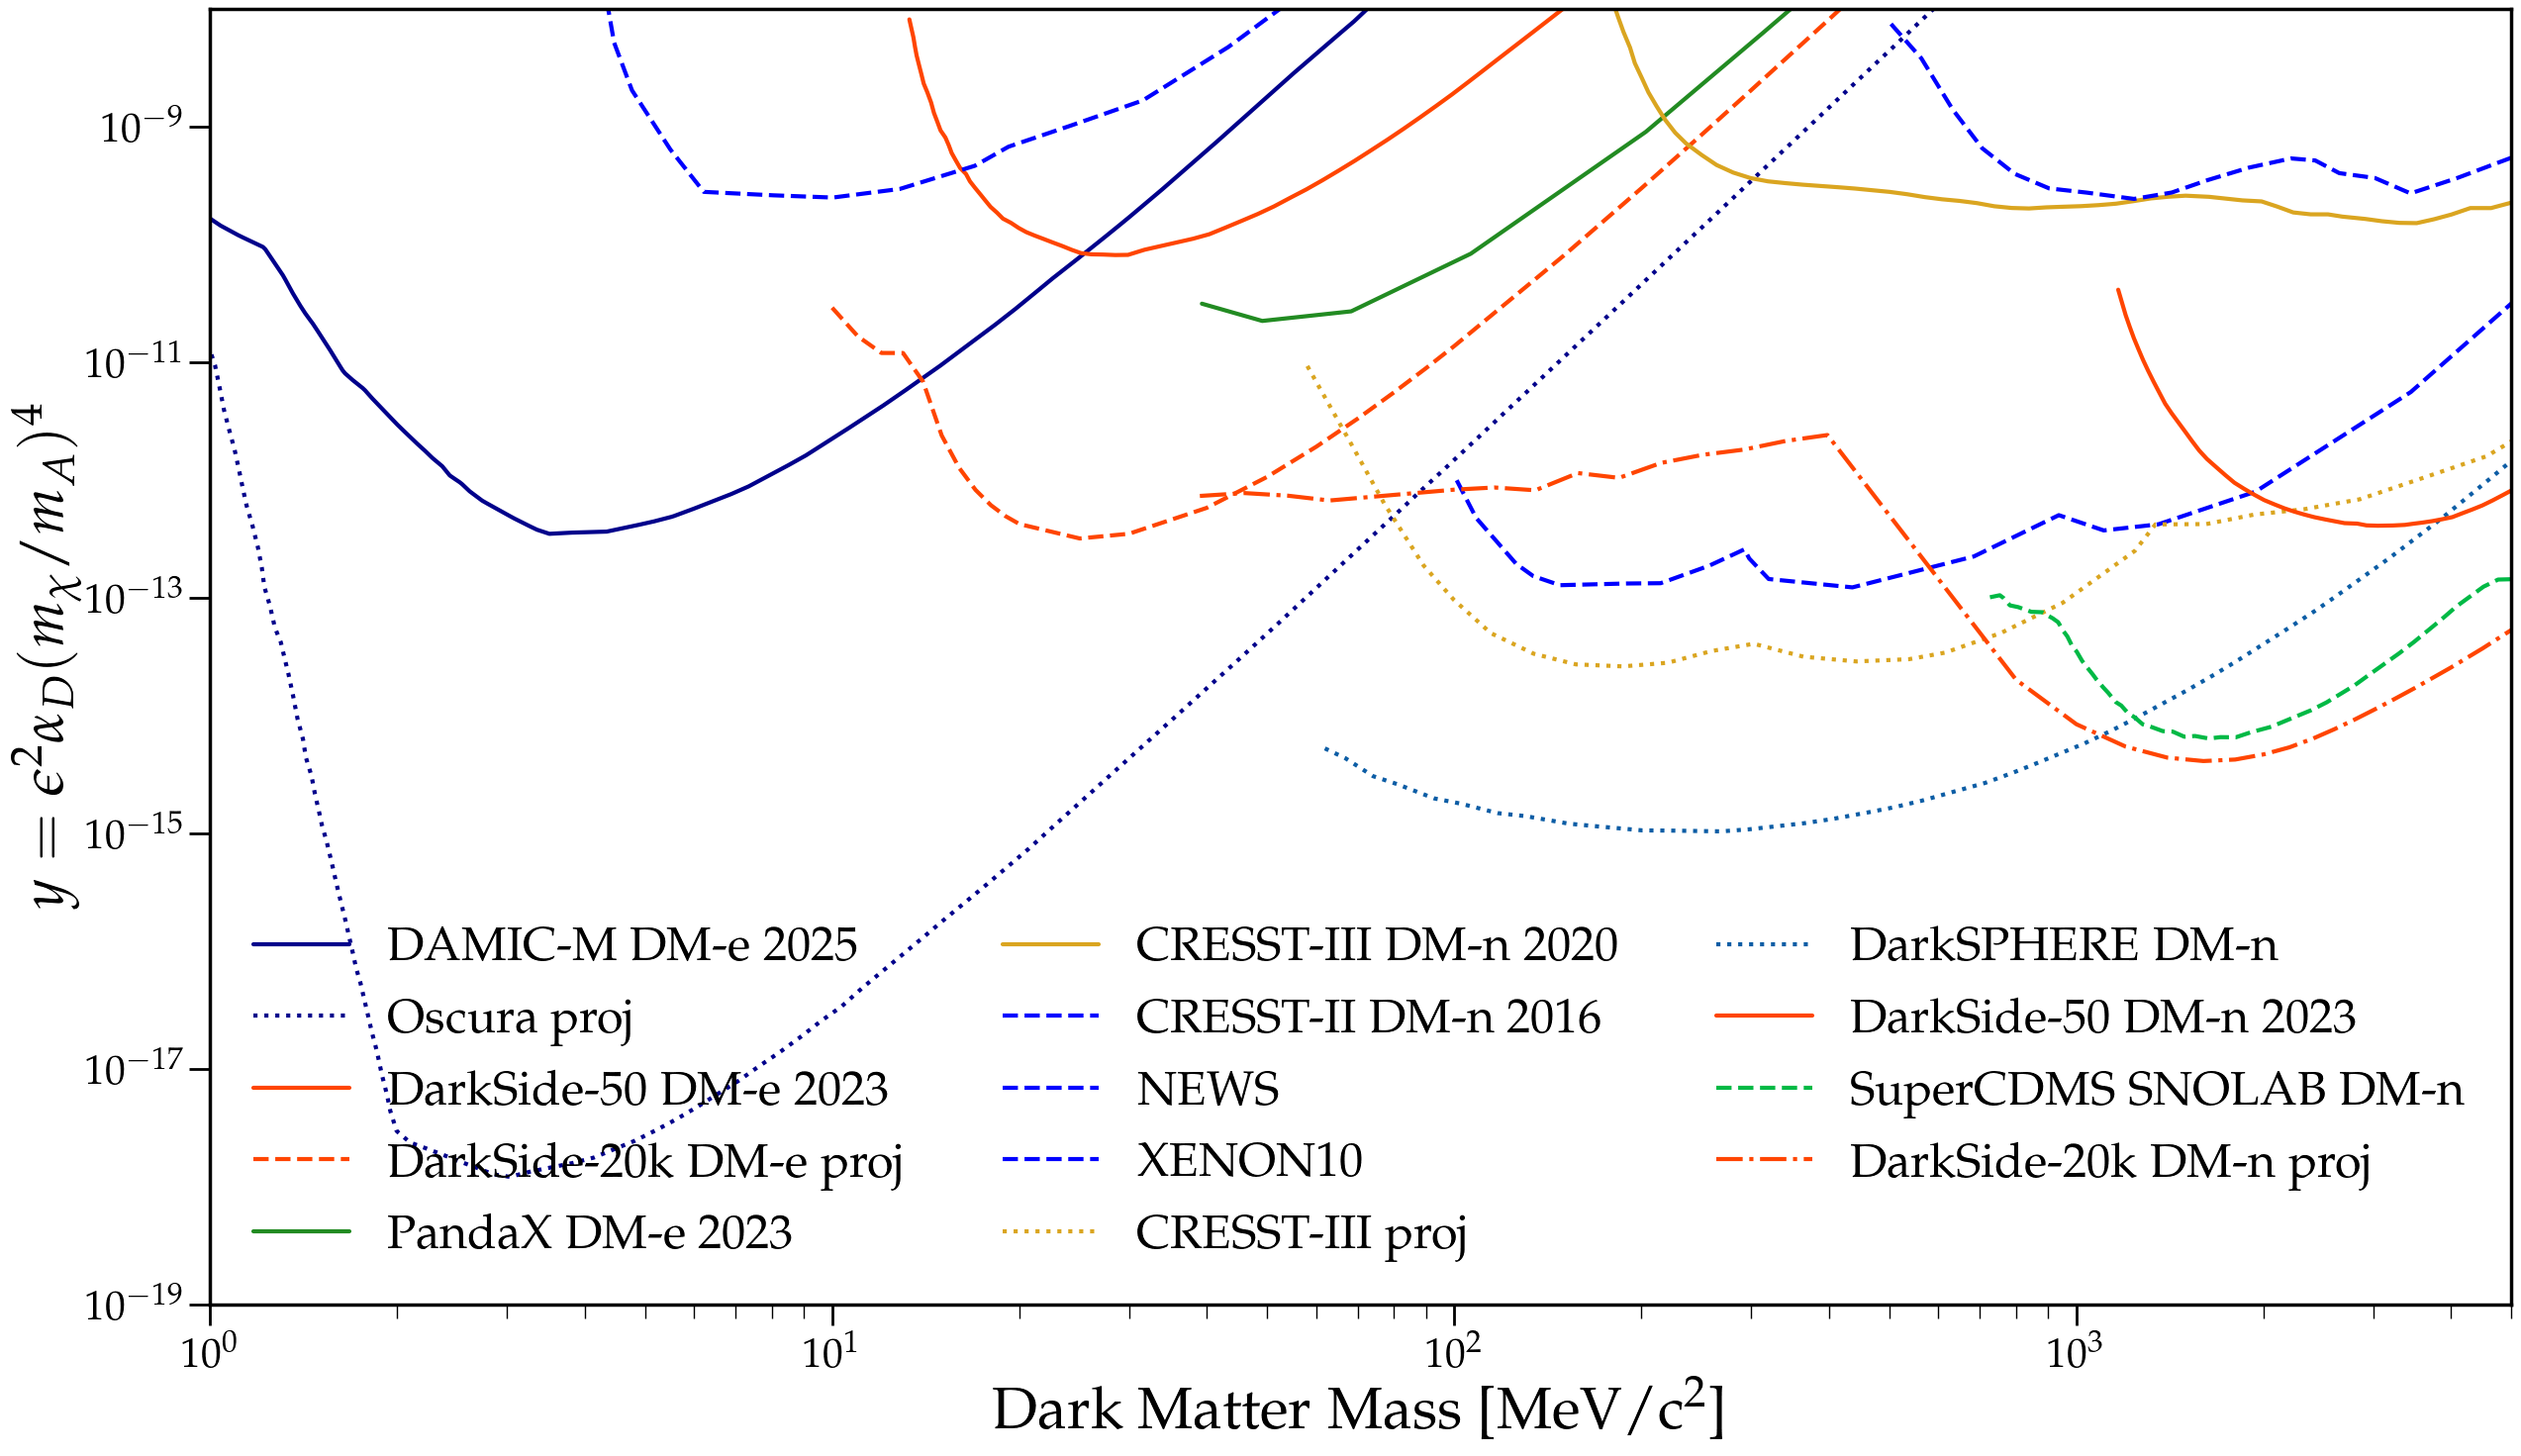

In [5]:
plt.figure(figsize=(30,17)) 

lcXLZD = 'royalblue'
lcDarkSide = 'orangered'
lcBRinv = 'goldenrod'
lcFCChh = 'darkblue'
lcFCCee = 'deeppink'
lcMuC = 'darkviolet'
lcILC = 'olive'
lcLHC = 'black'

plt.plot (damic_m_2025.m, damic_m_2025_re, label="DAMIC-M DM-e 2025", color=lcFCChh)
plt.plot (oscura.m, oscura_re, label="Oscura proj", linestyle=":", color=lcFCChh)
plt.plot (ds50_2023.m, ds50_2023_re, label="DarkSide-50 DM-e 2023", color=lcDarkSide)
plt.plot (ds20k.m, ds20k_re, label="DarkSide-20k DM-e proj", linestyle="--", color=lcDarkSide)
plt.plot (pandaX_2023.m, pandaX_2023_re, label="PandaX DM-e 2023", color="forestgreen")

plt.plot (cresst_nr.m*1e3, cresst_nr_re, label="CRESST-III DM-n 2020", color=lcBRinv)
plt.plot (cresst_II_nr.m, cresst_II_re, label="CRESST-II DM-n 2016", color="b", linestyle="--")
plt.plot (news_nr.m, news_nr_re, label="NEWS", color="b", linestyle="--")
plt.plot (xenon10.m, xe_re, label="XENON10", color="b", linestyle="--")

print (cresst_II_nr)
plt.plot (cresst_proj_nr.m*1e3, cresst_proj_nr_re, label="CRESST-III proj", linestyle=":", color=lcBRinv)
plt.plot (sphere_nr.m*1e3, sphere_nr_re, label="DarkSPHERE DM-n", linestyle=":")

plt.plot (ds50_2023_nr.m*1e3, ds50_2023_nr_re, label="DarkSide-50 DM-n 2023", color=lcDarkSide)
plt.plot (sCDMS_nr.m*1e3, sCDMS_nr_re, label="SuperCDMS SNOLAB DM-n", linestyle="--")

plt.plot (ds20k_nr.m, ds20k_nr_re, label="DarkSide-20k DM-n proj", linestyle="-.", color=lcDarkSide)

plt.ylim (1e-23, 1e-6)
plt.ylim (1e-19, 1e-8)
plt.xlim (0.1, 10000)
plt.xlim (1, 5000)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r'$y = \epsilon^2 \alpha_D (m_\chi / m_A)^4$')
plt.xlabel("Dark Matter Mass [MeV/c$^2$]")
plt.legend(ncol=3)

In [16]:
def mywrite(xaxis,ysigmas,name,comment) : 
    with open("Sensitivities_BC2_" + name + ".csv",'a') as the_file:
        the_file.write(comment+"\n") 
        for x,y in zip(xaxis,ysigmas) : 
            the_file.write( "%e, %e \n"%(x*1e-3,y)) 
            

In [17]:
mywrite (damic_m_2025.m, damic_m_2025_re, "DAMIC-M_2025", "mass,coupling")
mywrite (ds50_2023.m, ds50_2023_re, "DarkSide-50_2023","mass,coupling")
mywrite (pandaX_2023.m, pandaX_2023_re, "PandaX_2023", "mass,coupling")
mywrite (oscura.m, oscura_re, "Oscura","mass,coupling")
mywrite (sCDMS_nr.m*1e3, sCDMS_nr_re,"SuperCDMS_SNOLAB","mass,coupling")
mywrite (sphere_nr.m*1e3, sphere_nr_re, "DarkSPHERE","mass,coupling")

mywrite (ds50_2023_nr.m*1e3, ds50_2023_nr_re, "DD-NR-DarkSide-50_2023","mass,coupling")
mywrite(ds20k.m, ds20k_re, "darkside20k-DMe-heavymed-18t-yr","mass,coupling")
mywrite(ds20k_nr.m, ds20k_nr_re, "darkside20k-O1subGeVMigdal-18t-yr","mass,coupling")